In [1]:
import pandas as pd
df = pd.read_csv("Telco_Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print("Shape of dataset:", df.shape)
print("\n.Info:")
print(df.info())

Shape of dataset: (7043, 21)

.Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paper

In [8]:
df["TotalCharges"]=df["TotalCharges"].astype(str)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].str.strip(), errors = 'coerce')
print("Missing values after conversation:", df["TotalCharges"].isnull().sum())

Missing values after conversation: 11


In [9]:
df = df[df["TotalCharges"].notnull()]   #to drop the missing values because its only 11
print("New shape after dropping missing values:",df.shape)

New shape after dropping missing values: (7032, 21)


In [13]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [14]:
#Convert & Tidy Columns because this column datatype shows integer and other shows object

df["SeniorCitizen"] = df["SeniorCitizen"].replace({0: "No", 1:"Yes"})


In [15]:
print("Shape of dataset:", df.shape)
print("\n.Info:")
print(df.info())

Shape of dataset: (7032, 21)

.Info:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessB

In [16]:
for column in df.select_dtypes(include = 'object').columns:
    print(column,":",df[column].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
replace_cols = ['OnlineSecurity','MultipleLines','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for col in replace_cols:
    df[col] = df[col].replace({'No internet service' : 'No' , 'No internet service':'No'})

In [20]:
for column in df.select_dtypes(include = 'object').columns:
    print(column,":",df[column].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
#Overall Churn Count & Churn Rate

In [21]:
print("Churn count:\n",df["Churn"].value_counts()) # how many customer churned

churn_rate = df["Churn"].value_counts(normalize = True)*100
print("\nChurn percentage:\n" , churn_rate.round(2))

Churn count:
 Churn
No     5163
Yes    1869
Name: count, dtype: int64

Churn percentage:
 Churn
No     73.42
Yes    26.58
Name: proportion, dtype: float64


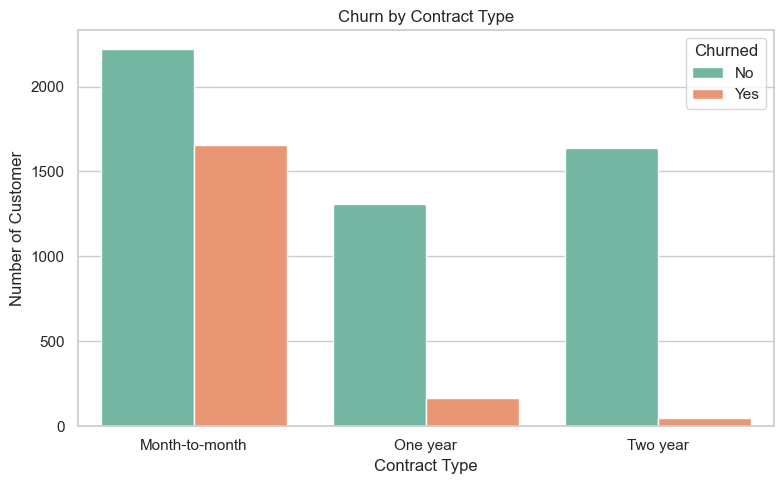

In [23]:
#Churn by Contract Type
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid")

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Contract" , hue = "Churn", palette = "Set2")

plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customer")
plt.legend(title ="Churned")
plt.tight_layout()
plt.savefig("churn_by_contract.png")
plt.show()


In [25]:
#Revenue Impact from Churned Customers
#revenue loss by churn status 

revenueloss_by_churn= df.groupby("Churn")["MonthlyCharges"].agg(["mean","sum","count"]).round(2)
print(revenueloss_by_churn)

        mean        sum  count
Churn                         
No     61.31  316530.15   5163
Yes    74.44  139130.85   1869


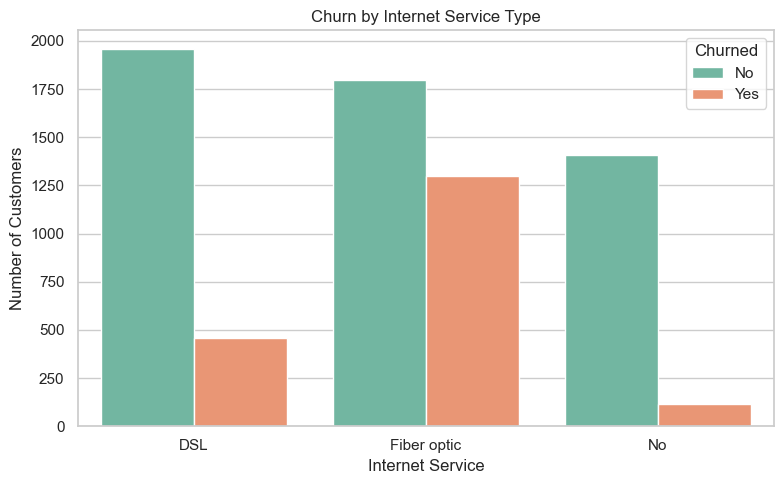

In [26]:
#Churn by Internet Service Type

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(data =df, x="InternetService", hue="Churn", palette = "Set2")

plt.title("Churn by Internet Service Type")
plt.xlabel("Internet Service")
plt.ylabel("Number of Customers")
plt.legend(title ="Churned")
plt.tight_layout()

plt.savefig("churn_by_internet_service.png")
plt.show()

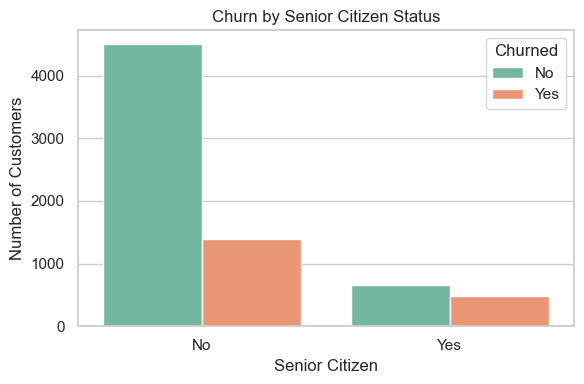

In [31]:
#Churn by Senior Citizen Status 

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(data= df, x="SeniorCitizen", hue="Churn", palette ="Set2")

plt.title("Churn by Senior Citizen Status")
plt.xlabel("Senior Citizen")
plt.ylabel("Number of Customers")
plt.legend(title = "Churned")
plt.tight_layout()

plt.savefig("churn_by_senior.png")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


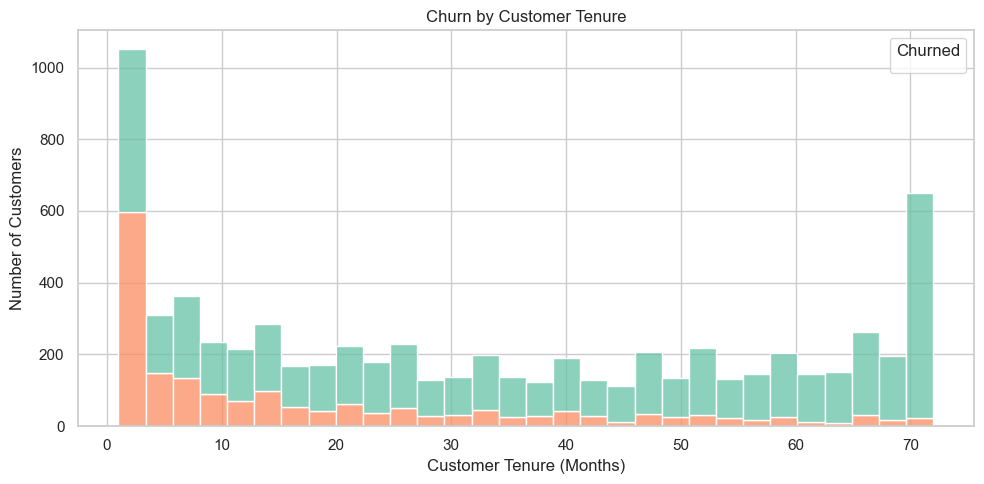

In [33]:
#Churn by Tenure /how long they stay before leaving 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "whitegrid")

plt.figure(figsize=(10,5))
sns.histplot(data=df, x="tenure", hue="Churn", multiple ="stack", bins=30, palette ="Set2")

plt.title("Churn by Customer Tenure")
plt.xlabel("Customer Tenure (Months)")
plt.ylabel("Number of Customers")
plt.legend(title ="Churned")
plt.tight_layout()
plt.savefig("churn_by_tenure.png")
plt.show()

In [34]:
#Predictive Modeling – Logistic Regression

from sklearn.preprocessing import LabelEncoder

model_df = df.copy()  #copy of cleaned dataset
model_df.drop(["customerID","TotalCharges"], axis =1, inplace = True)   #drop unneccesory columns

le = LabelEncoder()     #all categorical variables into numbers #'Yes' → 1, 'No' → 0 'Male' → 1, 'Female' → 0

for col in model_df.select_dtypes(include = 'object').columns:
    model_df[col] = le.fit_transform(model_df[col])

model_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,1,0,1,1,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [35]:
from sklearn.model_selection import train_test_split
x =model_df.drop("Churn" , axis = 1)
y =model_df["Churn"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

print("Training Set:", x_train.shape)
print("Testing Set:", x_test.shape)

Training Set: (5625, 18)
Testing Set: (1407, 18)


In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  #max number of time model try to fit for best solution
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix

# predict churn on test data
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)     #Measure how accurate the predictions are
print("Accuracy:", round(accuracy*100,2), "%")

cm= confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:\n", cm )

Accuracy: 78.75 %

 Confusion Matrix:
 [[921 112]
 [187 187]]


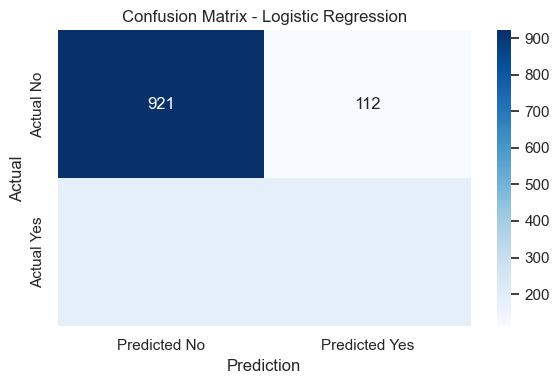

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (6,4))
sns.heatmap(cm,annot = True, fmt ='d', cmap ='Blues',
            xticklabels = ['Predicted No', 'Predicted Yes'],
            yticklabels = ['Actual No','Actual Yes'])

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix_logistic.png")
plt.show()


In [43]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=["Stayed", "Churned"])
print(report)

              precision    recall  f1-score   support

      Stayed       0.83      0.89      0.86      1033
     Churned       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [50]:
#Train a Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#create and train the model
rf_model = RandomForestClassifier(n_estimators = 100, random_state =42)
rf_model.fit(x_train,y_train)

# make predictions on test data
rf_pred = rf_model.predict(x_test)

rf_accuracy = accuracy_score(y_test,rf_pred)
print("Random Forest Accuracy:", round(rf_accuracy * 100, 2), "%")

rf_cm = confusion_matrix(y_test,rf_pred)
print("\n Confusion Matrix:\n", rf_cm)

print("\n Classification Report:\n")
print(classification_report(y_test,rf_pred,target_names = ["Stayed", "Churned"]))
                                  
                                  

Random Forest Accuracy: 78.25 %

 Confusion Matrix:
 [[924 109]
 [197 177]]

 Classification Report:

              precision    recall  f1-score   support

      Stayed       0.82      0.89      0.86      1033
     Churned       0.62      0.47      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



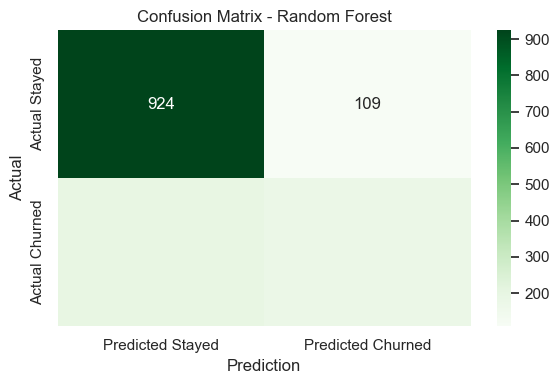

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Stayed', 'Predicted Churned'],
            yticklabels=['Actual Stayed', 'Actual Churned'])

plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix_rf.png") 
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


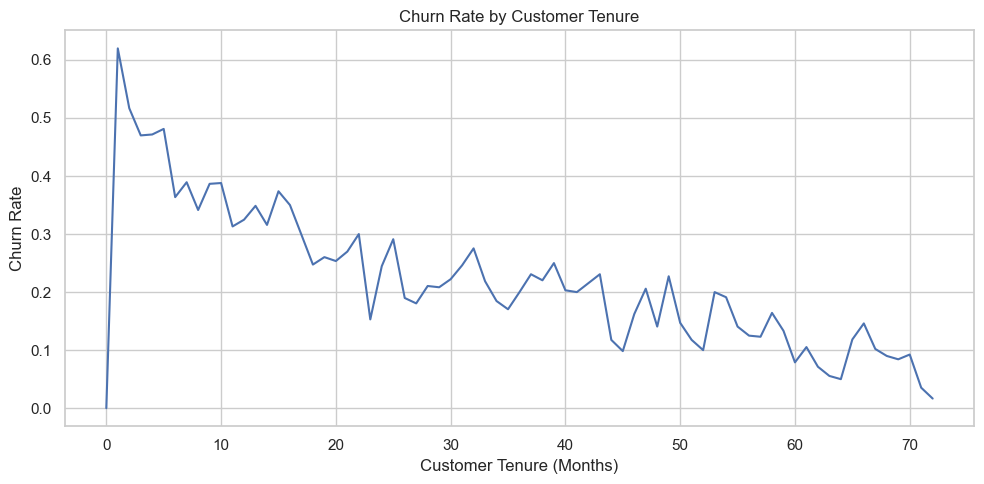

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Telco_Customer_Churn.csv")
# Convert churn column to binary
df["Churn"] = df["Churn"].apply(lambda x: 1 if str(x).strip().lower() == "yes" else 0)

df["tenure"] = pd.to_numeric(df["tenure"], errors='coerce')
tenure_churn = df.groupby("tenure")["Churn"].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=tenure_churn, x="tenure", y="Churn")
plt.title("Churn Rate by Customer Tenure")
plt.xlabel("Customer Tenure (Months)")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.tight_layout()
plt.savefig("churn_trend_by_tenure.png")

plt.show()
